In [1]:
import numpy as np
import pandas as pd
import regex as re
from tqdm import tqdm, trange
import swifter
from ast import literal_eval
import seaborn as sns
THREADS = 12

In [2]:
df = pd.read_csv("cleaned_ny.csv")

In [3]:
df

,year,sentence,cleaned
0,2018,As lawmakers threw up obstacles to a two-state...,"['as', 'lawmakers', 'threw', 'up', 'obstacles'..."
1,2018,"The rallies are the biggest in years, and are ...","['the', 'rallies', 'are', 'the', 'biggest', 'i..."
2,2018,Lean people were especially responsive to exer...,"['lean', 'people', 'were', 'especially', 'resp..."
3,2018,"Call it opera, rock concert or song cycle: an ...","['call', 'it', 'opera', 'rock', 'concert', 'or..."
4,2018,Birds that cannot effectively withstand cold s...,"['birds', 'that', 'cannot', 'effectively', 'wi..."
...,...,...,...
200578,2020,"During his rally in Newtown, Pa., on Saturday,...","['during', 'his', 'rally', 'in', 'newtown', 'p..."
200579,2020,A magnitude-7.0 quake that struck in the Aegea...,"['a', 'magnitude7', '0', 'quake', 'that', 'str..."
200580,2020,Former President Barack Obama on Saturday join...,"['former', 'president', 'barack', 'obama', 'on..."
200581,2020,Prime Minister Boris Johnson announced expansi...,"['prime', 'minister', 'boris', 'johnson', 'ann..."


In [10]:
df['len'] = df.cleaned.apply(literal_eval).apply(len)

In [13]:
df[df.len == df.len.min()]

,year,sentence,cleaned,len
5278,2018,뉴욕타임스는 한국인들이 남북한의 ’올림픽 협력’에 대해 어떻게 생각하는지 듣고 싶습...,[],0
5809,2018,뉴욕타임스는 한국인들이 남북한의 ’올림픽 협력’에 대해 어떻게 생각하는지 듣고 싶습...,[],0


<AxesSubplot:ylabel='Density'>

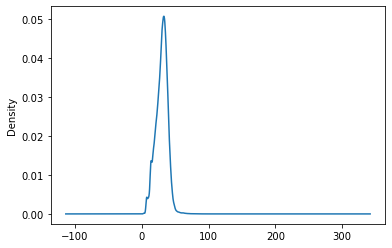

In [11]:
df.len.plot(kind="density")

In [12]:
df.len.describe()

count    200583.000000
mean         29.704551
std           8.892276
min           0.000000
25%          24.000000
50%          31.000000
75%          36.000000
max         228.000000
Name: len, dtype: float64

In [16]:
words2cnt = {}
for sent in tqdm(df.cleaned.tolist()):
    for word in sent:
        if word not in words2cnt:
            words2cnt[word] = 0
        words2cnt[word] += 1

100%|████████████████████████████████████████████████████████████████████████████████████| 200583/200583 [00:04<00:00, 49673.91it/s]


<AxesSubplot:ylabel='Density'>

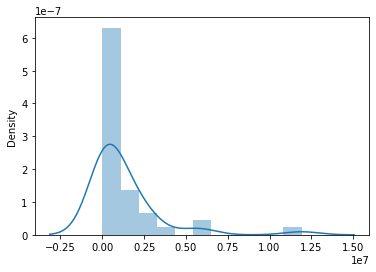

In [17]:
sns.distplot(list(words2cnt.values()))

In [18]:
pd.Series(list(words2cnt.values())).describe()

count    4.100000e+01
mean     1.296060e+06
std      2.203247e+06
min      8.536000e+03
25%      4.080400e+04
50%      5.354250e+05
75%      1.976934e+06
max      1.191646e+07
dtype: float64

In [ ]:
# df.to_csv("jigsaw_cleaned.csv", index=False)